# Advanced Regression

### Problem Statement :- 


    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company 
    uses data analytics to purchase houses at a price below their actual values and flip them on at a higher 
    price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 
    The company is looking at prospective properties to buy to enter the market. You are required to build 
    a regression model using regularisation in order to predict the actual value of the prospective properties 
    and decide whether to invest in them or not.
 
The company wants to know:

    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Data Understanding

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from scipy.stats import norm

In [3]:
#Reading the dataset

housing = pd.read_csv("~/Desktop/IIITB/Assignments_IIITB/Advanced Regression/train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Visualization

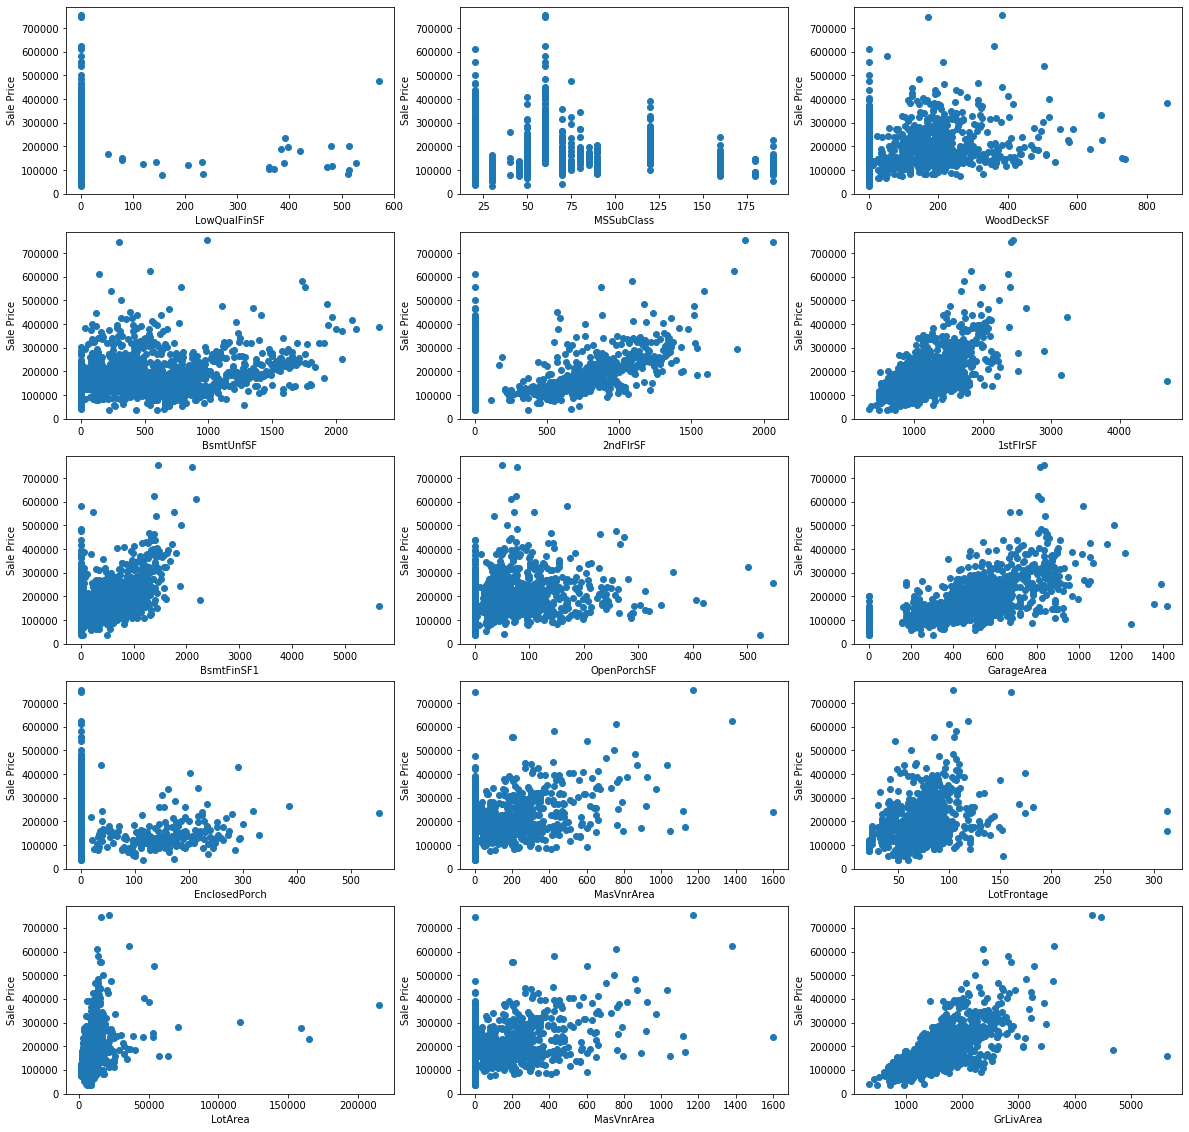

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
plt.scatter(housing.LowQualFinSF,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('LowQualFinSF')

plt.subplot(5,3,2)
plt.scatter(housing.MSSubClass,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('MSSubClass')


plt.subplot(5,3,3)
plt.scatter(housing.WoodDeckSF,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('WoodDeckSF')

plt.subplot(5,3,4)
plt.scatter(housing.BsmtUnfSF,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('BsmtUnfSF')

plt.subplot(5,3,5)
plt.scatter(housing['2ndFlrSF'],housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('2ndFlrSF')


plt.subplot(5,3,6)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')

plt.subplot(5,3,7)
plt.scatter(housing.BsmtFinSF1,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('BsmtFinSF1')

plt.subplot(5,3,8)
plt.scatter(housing.OpenPorchSF,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('OpenPorchSF')

plt.subplot(5,3,9)
plt.scatter(housing.GarageArea,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')

plt.subplot(5,3,10)
plt.scatter(housing.EnclosedPorch,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('EnclosedPorch')

plt.subplot(5,3,11)
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('MasVnrArea')

plt.subplot(5,3,12)
plt.scatter(housing.LotFrontage,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('LotFrontage')

plt.subplot(5,3,13)
plt.scatter(housing.LotArea,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('LotArea')

plt.subplot(5,3,14)
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('MasVnrArea')

plt.subplot(5,3,15)
plt.scatter(housing.GrLivArea,housing.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')

plt.show()

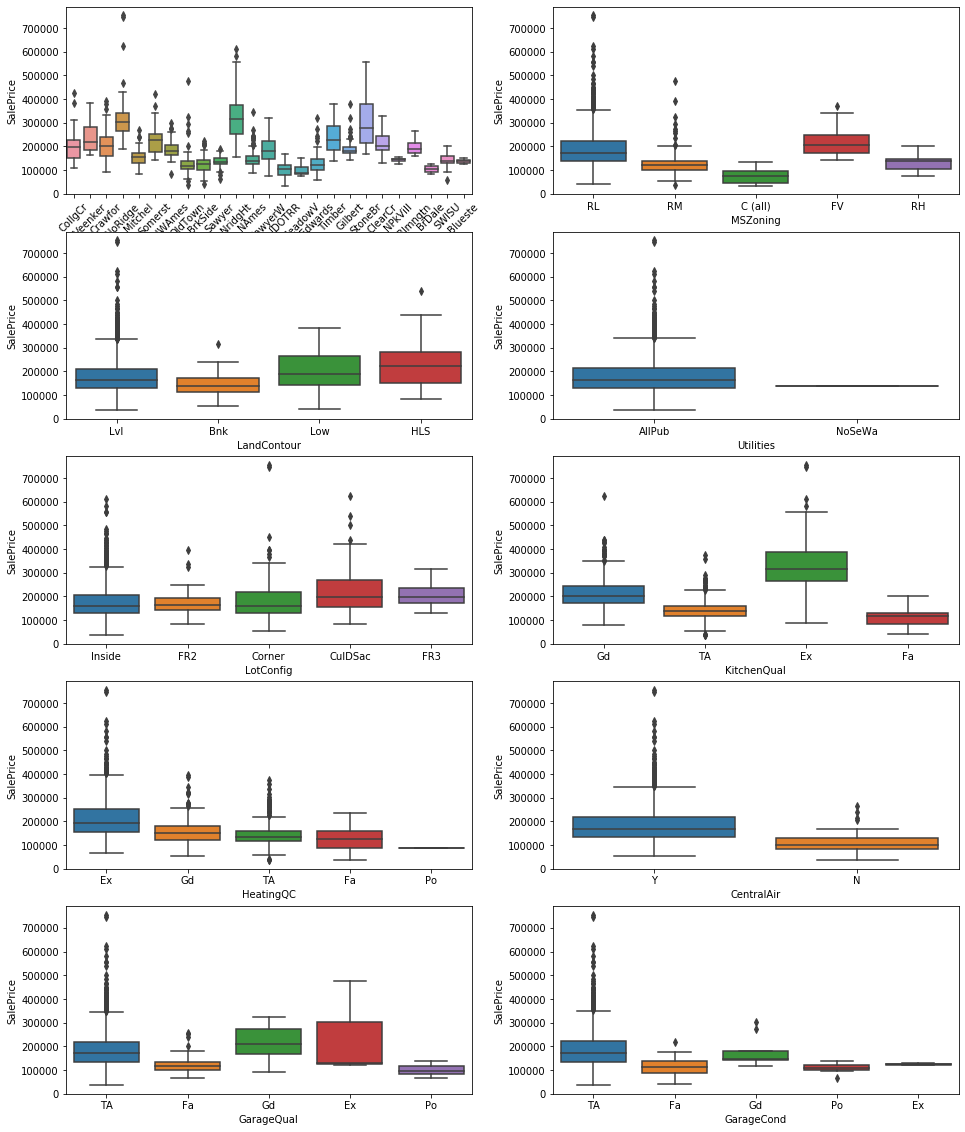

In [7]:
#Let's visualize the categorical varibles

plt.figure(figsize = (16,20))
plt.subplot(5,2,1)
sns.boxplot(x='Neighborhood',y='SalePrice',data=housing)
plt.xticks(rotation=45)
plt.subplot(5,2,2)
sns.boxplot(x='MSZoning',y='SalePrice',data=housing)
plt.subplot(5,2,3)
sns.boxplot(x='LandContour',y='SalePrice',data=housing)
plt.subplot(5,2,4)
sns.boxplot(x='Utilities',y='SalePrice',data=housing)
plt.subplot(5,2,5)
sns.boxplot(x='LotConfig',y='SalePrice',data=housing)
plt.subplot(5,2,6)
sns.boxplot(x='KitchenQual',y='SalePrice',data=housing)
plt.subplot(5,2,7)
sns.boxplot(x='HeatingQC',y='SalePrice',data=housing)
plt.subplot(5,2,8)
sns.boxplot(x='CentralAir',y='SalePrice',data=housing)
plt.subplot(5,2,9)
sns.boxplot(x='GarageQual',y='SalePrice',data=housing)
plt.subplot(5,2,10)
sns.boxplot(x='GarageCond',y='SalePrice',data=housing)


plt.show()



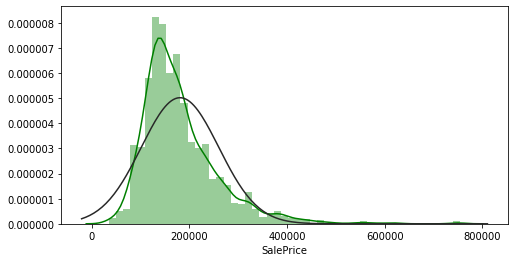

<Figure size 432x288 with 0 Axes>

In [8]:
#Checking the target varibale is normally distributed.
plt.figure(figsize = (8,4))
sns.distplot(housing.SalePrice, fit=norm, color='g')
fig = plt.figure()
plt.show()

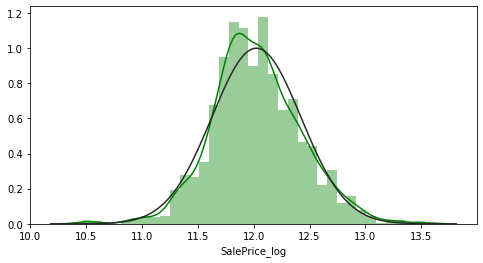

<Figure size 432x288 with 0 Axes>

In [9]:
#Tranforming the target varible for normal distribution.
plt.figure(figsize = (8,4))
housing['SalePrice_log'] = np.log(housing.SalePrice)
sns.distplot(housing.SalePrice_log, fit=norm, color='g')
fig = plt.figure()
plt.show()

In [10]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


### Outlier Treatment

In [11]:
# Dropping the columns which are discrete
housing_cont = housing.select_dtypes(include=['float64', 'int64'])
housing_cont = housing.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
housing_cont.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,WD,Normal,208500,12.247694
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,WD,Normal,181500,12.109011
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,WD,Normal,223500,12.317167
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,11.849398
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,WD,Normal,250000,12.429216


In [12]:
pd.set_option('display.max_columns', None)
housing_cont.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_log
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,12.024051
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,0.399452
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.460242
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,11.775097
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,12.001505
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,12.273731
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,12.535376
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,12.694958
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,13.000323


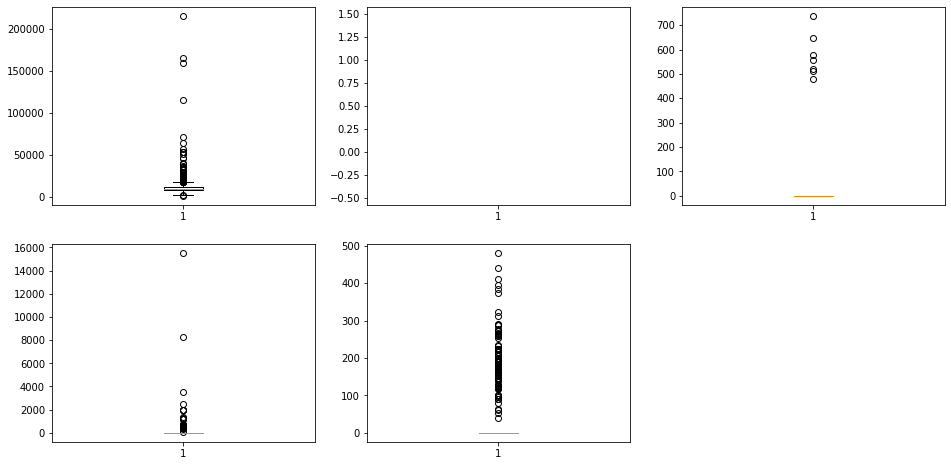

In [13]:
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
plt.boxplot(housing['LotArea'])
plt.subplot(2,3,2)
plt.boxplot(housing['MasVnrArea'])
plt.subplot(2,3,3)
plt.boxplot(housing['PoolArea'])
plt.subplot(2,3,4)
plt.boxplot(housing['MiscVal'])
plt.subplot(2,3,5)
plt.boxplot(housing['ScreenPorch'])

plt.show()

In [14]:
#Removing outliers

Q1 = housing['LotArea'].quantile(0.1)
Q3 = housing['LotArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['LotArea'] >= Q1 - 1.5*IQR) & (housing['LotArea'] <= Q3 + 1.5*IQR)]

Q1 = housing['MasVnrArea'].quantile(0.1)
Q3 = housing['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['MasVnrArea'] >= Q1 - 1.5*IQR) & (housing['MasVnrArea'] <= Q3 + 1.5*IQR)]

Q1 = housing['PoolArea'].quantile(0.1)
Q3 = housing['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['PoolArea'] >= Q1 - 1.5*IQR) & (housing['PoolArea'] <= Q3 + 1.5*IQR)]

Q1 = housing['MiscVal'].quantile(0.1)
Q3 = housing['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['MiscVal'] >= Q1 - 1.5*IQR) & (housing['MiscVal'] <= Q3 + 1.5*IQR)]

Q1 = housing['ScreenPorch'].quantile(0.1)
Q3 = housing['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['ScreenPorch'] >= Q1 - 1.5*IQR) & (housing['ScreenPorch'] <= Q3 + 1.5*IQR)]

In [15]:
housing.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
count,1255.000000,1255.000000,1042.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1177.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.0,1255.0,1255.0,1255.000000,1255.000000,1255.000000,1255.000000
mean,735.768924,57.525896,68.906910,9461.096414,6.063745,5.550598,1971.830279,1985.203984,92.221514,416.817530,42.363347,575.746614,1034.927490,1139.985657,339.880478,5.619920,1485.486056,0.409562,0.052590,1.565737,0.371315,2.858964,1.049402,6.481275,0.556972,1979.163127,1.748207,465.658167,92.478884,45.601594,23.075697,3.711554,0.0,0.0,0.0,6.319522,2007.796016,176168.991235,12.002526
std,423.342102,42.862981,22.992209,3794.592543,1.363368,1.104051,30.669235,20.806655,149.663782,419.839858,151.916498,446.829531,406.475704,364.701477,426.124625,47.462095,485.929328,0.511031,0.230333,0.539010,0.497976,0.808664,0.227561,1.605242,0.609387,24.881465,0.759015,213.309807,119.801395,63.288779,61.501454,30.300246,0.0,0.0,0.0,2.688340,1.326271,72481.153836,0.390761
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000,34900.000000,10.460242
25%,370.000000,20.000000,59.000000,7336.000000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,218.000000,788.000000,864.000000,0.000000,0.000000,1120.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000,2007.000000,128000.000000,11.759786
50%,735.000000,50.000000,68.000000,9200.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,353.000000,0.000000,490.000000,975.000000,1067.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1982.000000,2.000000,474.000000,0.000000,25.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000,158500.000000,11.973510
75%,1103.500000,70.000000,80.000000,11275.000000,7.000000,6.000000,2002.000000,2004.000000,157.000000,695.000000,0.000000,820.500000,1270.000000,1362.000000,720.000000,0.000000,1752.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,66.500000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000,210000.000000,12.254863
90%,1321.200000,120.000000,93.000000,13738.800000,8.000000,7.000000,2006.000000,2007.000000,306.000000,1012.600000,66.400000,1255.000000,1580.000000,1656.000000,929.600000,0.000000,2115.400000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,750.000000,252.000000,130.000000,114.000000,0.000000,0.0,0.0,0.0,10.000000,2010.000000,273200.000000,12.517953
95%,1388.300000,160.000000,105.000000,16056.900000,8.000000,8.000000,2007.000000,2007.000000,420.000000,1218.600000,376.500000,1484.100000,1728.000000,1789.200000,1121.300000,0.000000,2399.500000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,840.600000,322.000000,168.000000,184.000000,0.000000,0.0,0.0,0.0,11.000000,2010.000000,320000.000000,12.676076
99%,1446.460000,190.000000,135.770000,21806.120

In [16]:
housing.shape

(1255, 82)

### Correlation Matrix

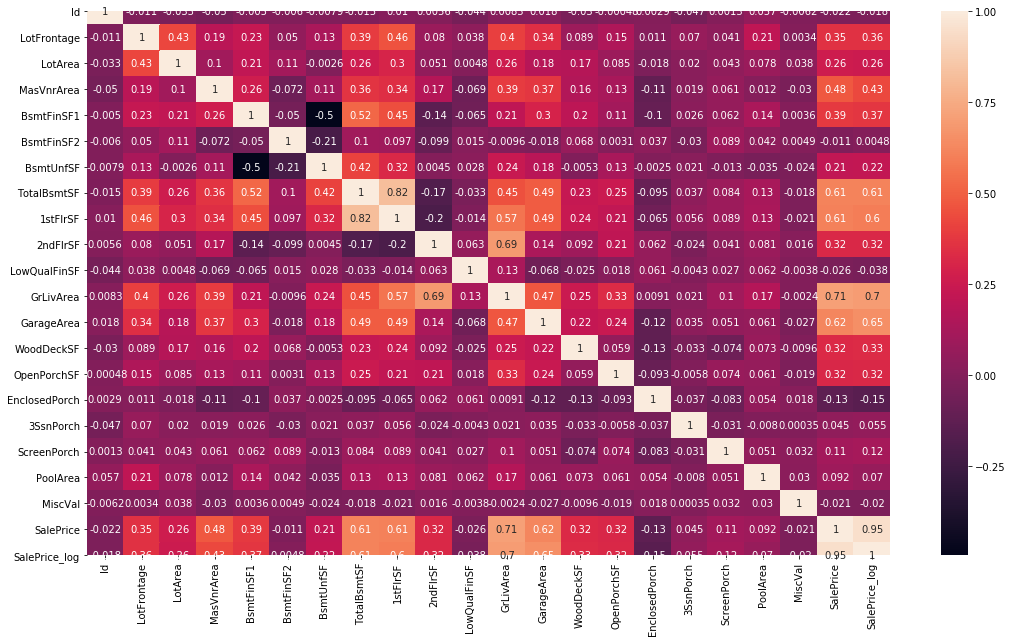

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(housing_cont.corr(),annot=True)
plt.show()

### Data Cleansing

In [18]:
# Finding the columns which are having more than 50% null values
null_gr50 = housing.columns[100*(housing.isnull().sum()/len(housing.index)) > 50]
print(null_gr50)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [19]:
# Drop all the above coulmns which are having greater than 50% NULL Values
housing = housing.drop(columns = null_gr50, axis=1)
housing.shape

(1255, 77)

In [20]:
# Drop raw SalePrice, since its already log transformed
housing = housing.drop('SalePrice', axis=1)
housing.shape

(1255, 76)

In [21]:
housing['YearBuilt_age'] = housing.YearBuilt.max()-housing.YearBuilt
housing['YearRemodAdd_age'] = housing.YearRemodAdd.max()-housing.YearRemodAdd
housing['GarageYrBlt_age'] = housing.GarageYrBlt.max()-housing.GarageYrBlt
housing['YrSold_age'] = housing.YrSold.max()-housing.YrSold
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_age','YearRemodAdd_age',
             'GarageYrBlt_age','YrSold_age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
89,1994,1995,NaN,2007,16,15,NaN,3
1279,1920,1950,1980.0,2010,90,60,30.0,0
1133,1995,1995,1995.0,2009,15,15,15.0,1
1322,1992,1992,1992.0,2010,18,18,18.0,0
1401,2004,2004,2004.0,2008,6,6,6.0,2
201,1977,1977,1980.0,2008,33,33,30.0,2
375,1922,1950,NaN,2009,88,60,NaN,1
753,2005,2005,2005.0,2006,5,5,5.0,4
577,1966,1966,1966.0,2006,44,44,44.0,4
82,2007,2007,2007.0,2008,3,3,3.0,2


In [22]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice_log,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216,10,10,10.0,2


In [23]:
# Finding if there are any NULL values in the dataframe
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total', 'percent'])
missing_data.head(15)

,total,percent
LotFrontage,213,0.169721
GarageFinish,78,0.062151
GarageQual,78,0.062151
GarageCond,78,0.062151
GarageType,78,0.062151
GarageYrBlt_age,78,0.062151
BsmtExposure,35,0.027888
BsmtFinType2,35,0.027888
BsmtFinType1,34,0.027092
BsmtCond,34,0.027092


In [24]:
#Imputing above columns with mode or mean or median

housing.BsmtCond = housing['BsmtCond'].fillna(-1)
housing.BsmtQual = housing['BsmtQual'].fillna(-1)
housing.BsmtExposure = housing['BsmtExposure'].fillna(housing['BsmtExposure'].mode()[0]) 
housing.BsmtFinType1 = housing['BsmtFinType1'].fillna(-1)
housing.BsmtFinType2 = housing['BsmtFinType2'].fillna(-1)
housing.Electrical = housing['Electrical'].fillna(housing['Electrical'].mode()[0]) 
housing.GarageType = housing['GarageType'].fillna(-1)
housing.GarageFinish = housing['GarageFinish'].fillna(-1)
housing.GarageQual = housing['GarageQual'].fillna(-1)
housing.GarageCond = housing['GarageCond'].fillna(-1)
housing.GarageYrBlt_age = housing.GarageYrBlt_age.fillna(-1)
housing.MasVnrArea = housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean()) 
housing.LotFrontage = housing['LotFrontage'].fillna(housing['LotFrontage'].mean())
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice_log,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216,10,10,10.0,2


In [25]:
# Finding if there are any NULL values in the dataframe
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total', 'percent'])
missing_data.head()

,total,percent
YrSold_age,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0


In [26]:
housing.shape

(1255, 76)

In [27]:
# checking the categorical varibales to convert them

housing[list(housing.dtypes[housing.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
#Converting categorical varibales to dummies

dummies = pd.get_dummies(housing[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                  'RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                  'Foundation','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2',
                                  'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                  'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                  'SaleType','SaleCondition']],drop_first=True) #'FireplaceQu'

In [29]:
# merging this dummies with original datframe

housing = pd.concat([housing,dummies],axis='columns')

In [30]:
# Dropping the original columns

housing = housing.drop(['Id','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                  'RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                  'Foundation','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2',
                                  'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                  'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                  'SaleType','SaleCondition'],axis='columns') #'FireplaceQu'

In [31]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice_log,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,7,7,7.0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [32]:
# saving the merged dataset in a CSV file
housing.to_csv("housing.csv")

### Splitting the Dataset

In [33]:
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

### Scaling the dataset

In [34]:
num_col = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
           'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
           'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','MoSold','SalePrice_log']
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [35]:
y_train = df_train.pop('SalePrice_log')
X_train = df_train

y_test = df_test.pop('SalePrice_log')
X_test = df_test

### Model Building - Lasso

In [36]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.939225672914867
0.916249178935275


In [37]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.119),
 ('MSSubClass', -0.038),
 ('LotFrontage', 0.008),
 ('LotArea', 0.059),
 ('OverallQual', 0.172),
 ('OverallCond', 0.133),
 ('MasVnrArea', -0.008),
 ('BsmtFinSF1', 0.07),
 ('BsmtFinSF2', 0.017),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.104),
 ('1stFlrSF', 0.014),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.01),
 ('GrLivArea', 0.315),
 ('BsmtFullBath', 0.03),
 ('BsmtHalfBath', -0.005),
 ('FullBath', 0.033),
 ('HalfBath', 0.036),
 ('BedroomAbvGr', -0.013),
 ('KitchenAbvGr', -0.024),
 ('TotRmsAbvGrd', 0.002),
 ('Fireplaces', 0.033),
 ('GarageCars', 0.077),
 ('GarageArea', 0.016),
 ('WoodDeckSF', 0.026),
 ('OpenPorchSF', 0.029),
 ('EnclosedPorch', 0.025),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YearBuilt_age', -0.006),
 ('YearRemodAdd_age', -0.003),
 ('GarageYrBlt_age', 0.001),
 ('YrSold_age', 0.003),
 ('MSZoning_FV', 0.095),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.055),
 ('MSZoning_RM', 0.0),
 ('Street_P

### Optimal Value of Alpha

In [38]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 20.0]}

# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046416,0.006615,0.001307,0.000026,0.001,{'alpha': 0.001},0.903574,0.923143,0.910413,0.905689,0.896981,0.907975,0.008737,1,0.945224,0.940932,0.941697,0.943190,0.945555,0.943320,0.001843
1,0.008286,0.000228,0.001323,0.000062,0.01,{'alpha': 0.01},0.896655,0.911155,0.901015,0.887256,0.891206,0.897476,0.008295,2,0.909193,0.905024,0.907260,0.909763,0.908449,0.907938,0.001680
2,0.004624,0.000016,0.001267,0.000005,1,{'alpha': 1.0},0.415842,0.430395,0.423373,0.429301,0.466211,0.432991,0.017364,3,0.449315,0.443136,0.444348,0.446188,0.435242,0.443646,0.004690
3,0.004479,0.000107,0.001266,0.000002,5,{'alpha': 5.0},0.375261,0.338073,0.362558,0.396817,0.420089,0.378492,0.028148,4,0.392269,0.382711,0.386043,0.393896,0.378513,0.386687,0.005765
4,0.004117,0.000007,0.001298,0.000038,10,{'alpha': 10.0},0.265298,0.247136,0.238461,0.293082,0.290771,0.266892,0.022162,5,0.273111,0.285362,0.259574,0.281279,0.250641,0.269993,0.013087


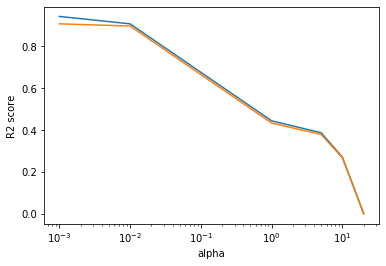

In [40]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.show()

In [41]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

### Building Lasso Model with Optimal Alpha value

In [42]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict & train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# predict & test score
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.939225672914867
0.916249178935275


In [43]:
# lasso model final parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Featuere','Coef']

In [44]:
pd.set_option('display.max_rows', None)
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
59,Neighborhood_Crawfor,0.346
75,Neighborhood_StoneBr,0.322
14,GrLivArea,0.315
69,Neighborhood_NridgHt,0.179
4,OverallQual,0.172
114,Exterior1st_BrkFace,0.155
199,Functional_Typ,0.146
232,SaleCondition_Normal,0.137
5,OverallCond,0.133
226,SaleType_New,0.122


### Building Ridge Model

In [45]:
lm = Ridge(alpha=0.001)
lm.fit(X_train,y_train)

#Predict and train score
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#Predict and test score
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9522181091689208
0.9023788841507193


Here we can see that there little overfittling for the `alpha` 0.001. However, let's try if we get better score with any other optimal value for Ridge.

In [46]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 2.0, 5.0, 9.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 2.0,
                                   5.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008903,0.002700,0.001762,0.000498,0.001,{'alpha': 0.001},0.931288,0.890972,0.809056,0.901331,0.810045,0.934536,0.843720,0.898553,0.926168,0.838914,0.878449,0.046442,12,0.951235,0.954917,0.956659,0.953913,0.960690,0.950959,0.954326,0.953436,0.952093,0.956128,0.954436,0.002762
1,0.005828,0.001076,0.001493,0.000335,0.01,{'alpha': 0.01},0.932414,0.891265,0.816181,0.902885,0.812636,0.935701,0.844548,0.899044,0.926116,0.841328,0.880204,0.045119,11,0.951224,0.954911,0.956647,0.953905,0.960682,0.950951,0.954318,0.953431,0.952087,0.956123,0.954428,0.002761
2,0.005434,0.000640,0.001259,0.000033,0.1,{'alpha': 0.1},0.936861,0.893528,0.854147,0.912412,0.823003,0.939781,0.847772,0.902991,0.925885,0.856969,0.889330,0.039111,10,0.950907,0.954669,0.956187,0.953562,0.960392,0.950662,0.954085,0.953196,0.951859,0.955891,0.954141,0.002750
3,0.005055,0.000062,0.001249,0.000037,0.2,{'alpha': 0.2},0.938072,0.895273,0.871324,0.918135,0.827453,0.941042,0.848313,0.905981,0.925738,0.866150,0.893743,0.037022,9,0.950558,0.954320,0.955596,0.953083,0.960003,0.950301,0.953816,0.952842,0.951551,0.955520,0.953759,0.002723
4,0.005174,0.000131,0.001300,0.000116,0.5,{'alpha': 0.5},0.938495,0.898510,0.890987,0.926563,0.833811,0.942152,0.847699,0.911142,0.925394,0.878983,0.899367,0.035195,8,0.949685,0.953287,0.954101,0.951746,0.958878,0.949316,0.953135,0.951790,0.950673,0.954389,0.952700,0.002644


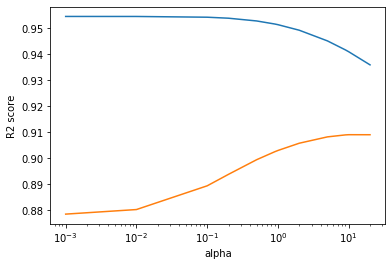

In [48]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.show()

In [49]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 10.0}

### Building Ridge Model with Optimal alpha value

In [50]:
lm = Ridge(alpha=10.0)
lm.fit(X_train, y_train)

# predict & train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# predict & test score
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9399607417226383
0.9181062283481741


In [51]:
# Ridge model final parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef.columns = ['Featuere','Coef']

In [52]:
pd.set_option('display.max_rows', None)
ridge_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
59,Neighborhood_Crawfor,0.258
75,Neighborhood_StoneBr,0.198
14,GrLivArea,0.175
4,OverallQual,0.171
199,Functional_Typ,0.167
5,OverallCond,0.138
232,SaleCondition_Normal,0.132
114,Exterior1st_BrkFace,0.124
79,Condition1_Norm,0.117
69,Neighborhood_NridgHt,0.113


### Conclusion:- 

    - R2 score is 92% for Lasso model at the optimal alpha value of 0.001
    - R2 score is 92% for Ridge model at the optimal alpha value of 10.0
    - Though R2 score is almost same for both Lasso and Ridge, Lasso is useful for feature selection, let's go 
      with Lasso model as final model.

Below features are best explaining the SalePrice.

`Neighborhood_Crawfor`
`Neighborhood_StoneBr`
`GrLivArea`
`Neighborhood_NridgHt`
`OverallQual`
`Exterior1st_BrkFace`
`Functional_Typ`
`SaleCondition_Normal`
`OverallCond`
`SaleType_New`
`Condition1_Norm`

# Building new model after removing the top most 5 predictor varibales identified in the previous model.

In [53]:
X_train.shape

(878, 233)

In [54]:
X_test.shape

(377, 233)

In [55]:
#Dropping top 5 predictor varibales identified in the previous model.

X_train_new = X_train.drop(['Neighborhood_Crawfor','Neighborhood_StoneBr','GrLivArea', 'Neighborhood_NridgHt','OverallQual'], axis=1)
X_test_new  = X_test.drop (['Neighborhood_Crawfor','Neighborhood_StoneBr','GrLivArea', 'Neighborhood_NridgHt','OverallQual'], axis=1)

In [56]:
print(X_train_new.shape)
print(X_test_new.shape)

(878, 228)
(377, 228)


### Model Building - Lasso

In [57]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new,y_train)

y_train_pred = lm.predict(X_train_new)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test_new)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9301938840050193
0.907735783446325


In [58]:
df_train_new = df_train.drop(['Neighborhood_Crawfor','Neighborhood_StoneBr','GrLivArea', 'Neighborhood_NridgHt','OverallQual'], axis=1)

In [59]:
df_train_new.shape

(878, 228)

In [60]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train_new.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.011),
 ('MSSubClass', -0.013),
 ('LotFrontage', 0.009),
 ('LotArea', 0.058),
 ('OverallCond', 0.158),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.069),
 ('BsmtFinSF2', 0.017),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.131),
 ('1stFlrSF', 0.295),
 ('2ndFlrSF', 0.305),
 ('LowQualFinSF', 0.01),
 ('BsmtFullBath', 0.024),
 ('BsmtHalfBath', -0.008),
 ('FullBath', 0.036),
 ('HalfBath', 0.03),
 ('BedroomAbvGr', -0.021),
 ('KitchenAbvGr', -0.045),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.054),
 ('GarageCars', 0.08),
 ('GarageArea', 0.024),
 ('WoodDeckSF', 0.021),
 ('OpenPorchSF', 0.03),
 ('EnclosedPorch', 0.025),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.012),
 ('YearBuilt_age', -0.007),
 ('YearRemodAdd_age', -0.003),
 ('GarageYrBlt_age', 0.001),
 ('YrSold_age', 0.004),
 ('MSZoning_FV', 0.153),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.09),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShap

### Optimal Value of Alpha

In [61]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 20.0]}

# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045200,0.004940,0.003348,0.001061,0.001,{'alpha': 0.001},0.892586,0.909879,0.905838,0.877578,0.876713,0.892554,0.013794,1,0.935912,0.932832,0.932405,0.934730,0.939110,0.934998,0.002418
1,0.006615,0.000255,0.001431,0.000195,0.01,{'alpha': 0.01},0.885126,0.895622,0.897079,0.855811,0.875202,0.881805,0.015186,2,0.895757,0.891738,0.890987,0.899950,0.896131,0.894913,0.003258
2,0.008883,0.003637,0.003045,0.001362,1,{'alpha': 1.0},0.415842,0.430395,0.423373,0.429301,0.466211,0.432991,0.017364,3,0.449315,0.443136,0.444348,0.446188,0.435242,0.443646,0.004690
3,0.014407,0.001931,0.003212,0.000749,5,{'alpha': 5.0},0.375261,0.338073,0.362558,0.396817,0.420089,0.378492,0.028148,4,0.392269,0.382711,0.386043,0.393896,0.378513,0.386687,0.005765
4,0.011446,0.001381,0.004210,0.000912,10,{'alpha': 10.0},0.265298,0.247136,0.238461,0.293082,0.290771,0.266892,0.022162,5,0.273111,0.285362,0.259574,0.281279,0.250641,0.269993,0.013087


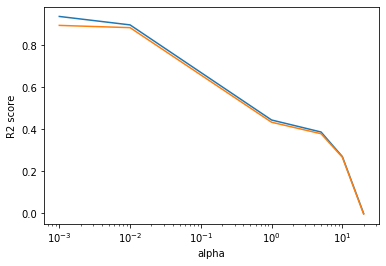

In [63]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.show()

In [64]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

### Building Lasso Model with Optimal Alpha value

In [65]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict & train score
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# predict & test score
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9301938840050193
0.907735783446325


In [83]:
# lasso model final parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train_new.columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Featuere','Coef']

In [84]:
pd.set_option('display.max_rows', None)
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
11,2ndFlrSF,0.280
10,1stFlrSF,0.276
194,Functional_Typ,0.239
35,MSZoning_FV,0.196
37,MSZoning_RL,0.182
109,Exterior1st_BrkFace,0.177
227,SaleCondition_Normal,0.164
4,OverallCond,0.157
74,Condition1_Norm,0.133
181,CentralAir_Y,0.128


### Top 5 varibales of Second Model after excluding top 5 varibales :- 

Below are the most important five predictor varibales after excluding the top 5 varibales from the previous model.

`2ndFlrSF`
`1stFlrSF`
`Functional_Typ`
`MSZoning_FV`
`MSZoning_FV`